<h1><center>Analysis of Student Performance with Machine Learning</center></h1>

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl
from math import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# getting the shape of the data
print(data.shape)

(1000, 8)


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
#check the no. of unique items present in the categorical column
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [6]:
# checking the percentage of missing data in each column
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <Axes: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.65E-02'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=3.90E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=2.05E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=2.04E-02'}, xlabel='math score', ylabel='lunch'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

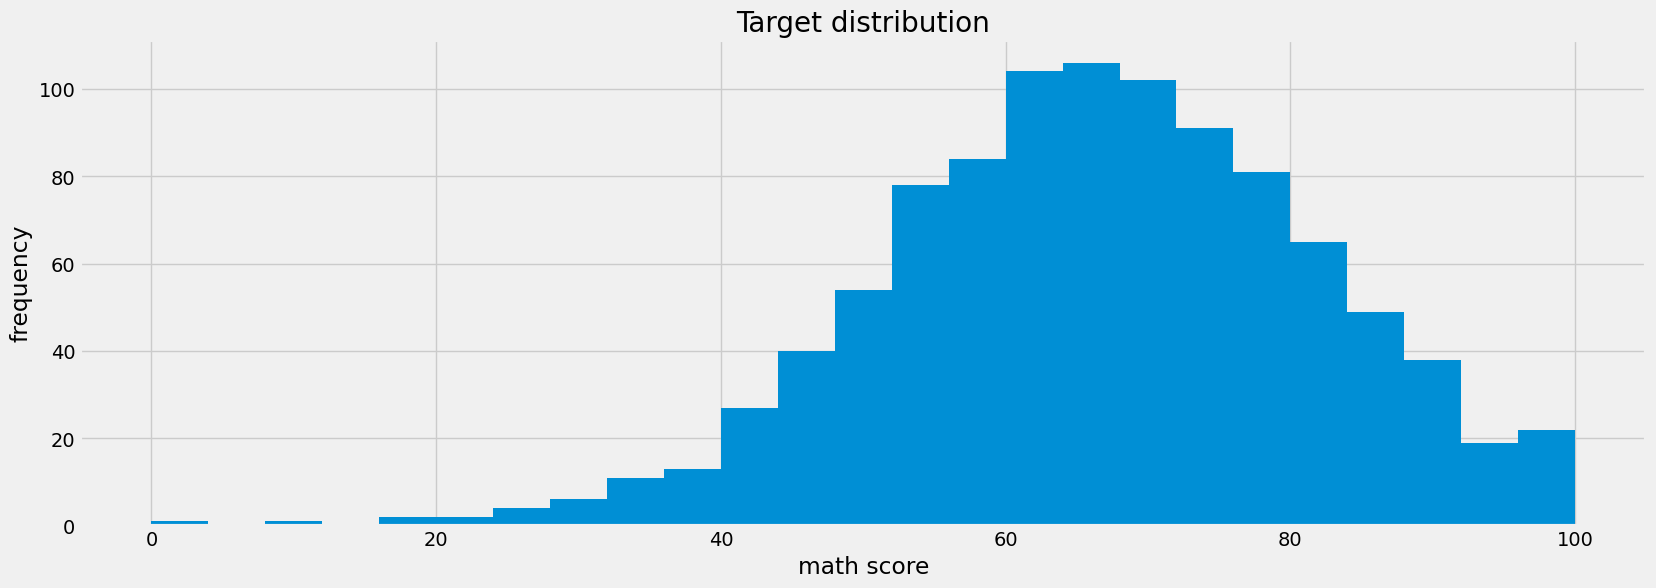

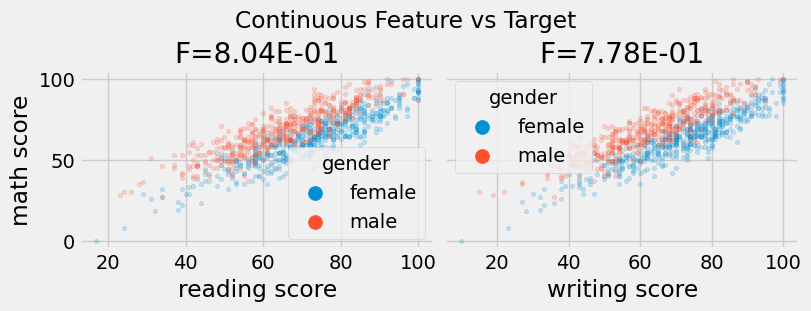

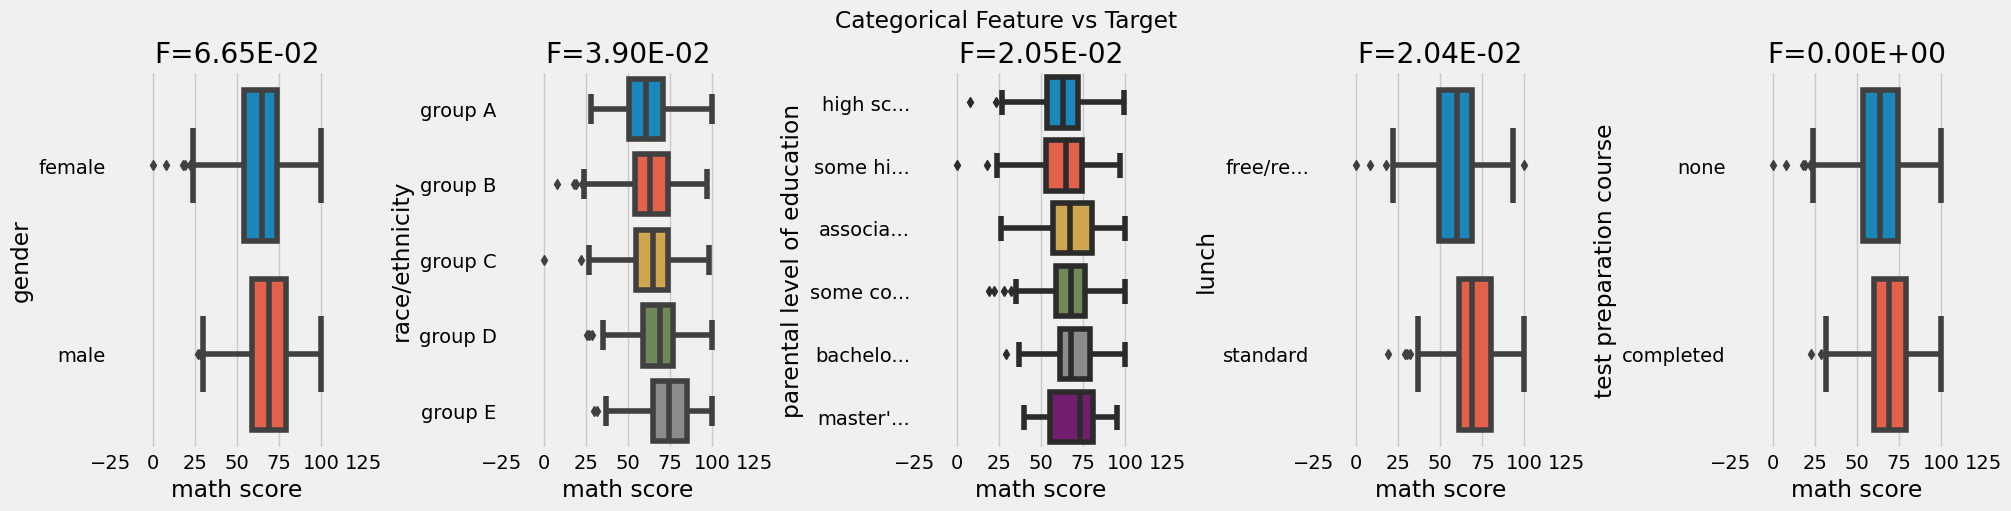

In [7]:
#comparison of all other attributes with respect to Math Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <Axes: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=4.30E-02'}, xlabel='reading score', ylabel='gender'>,
         <Axes: title={'center': 'F=3.56E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=2.71E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=5.64E-03'}, xlabel='reading score', ylabel='lunch'>,
         <Axes: title={'center': 'F=4.40E-03'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

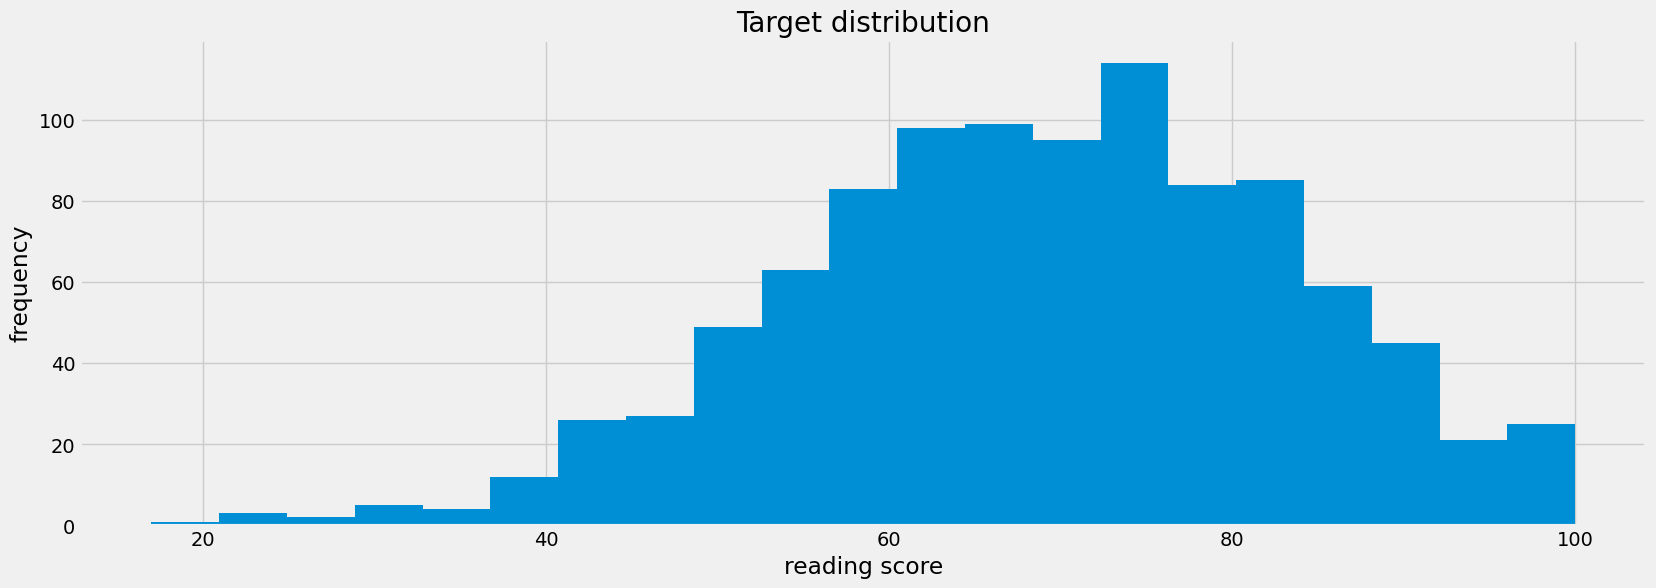

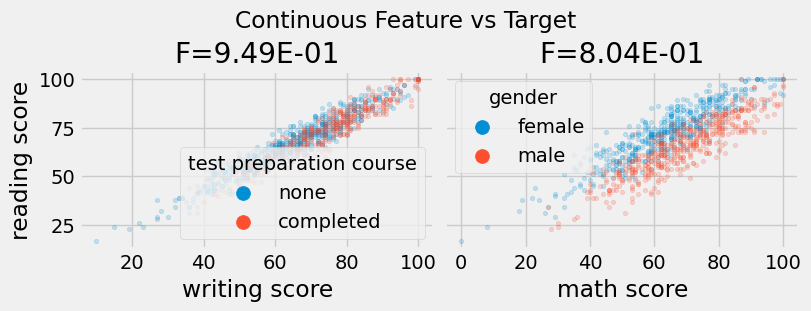

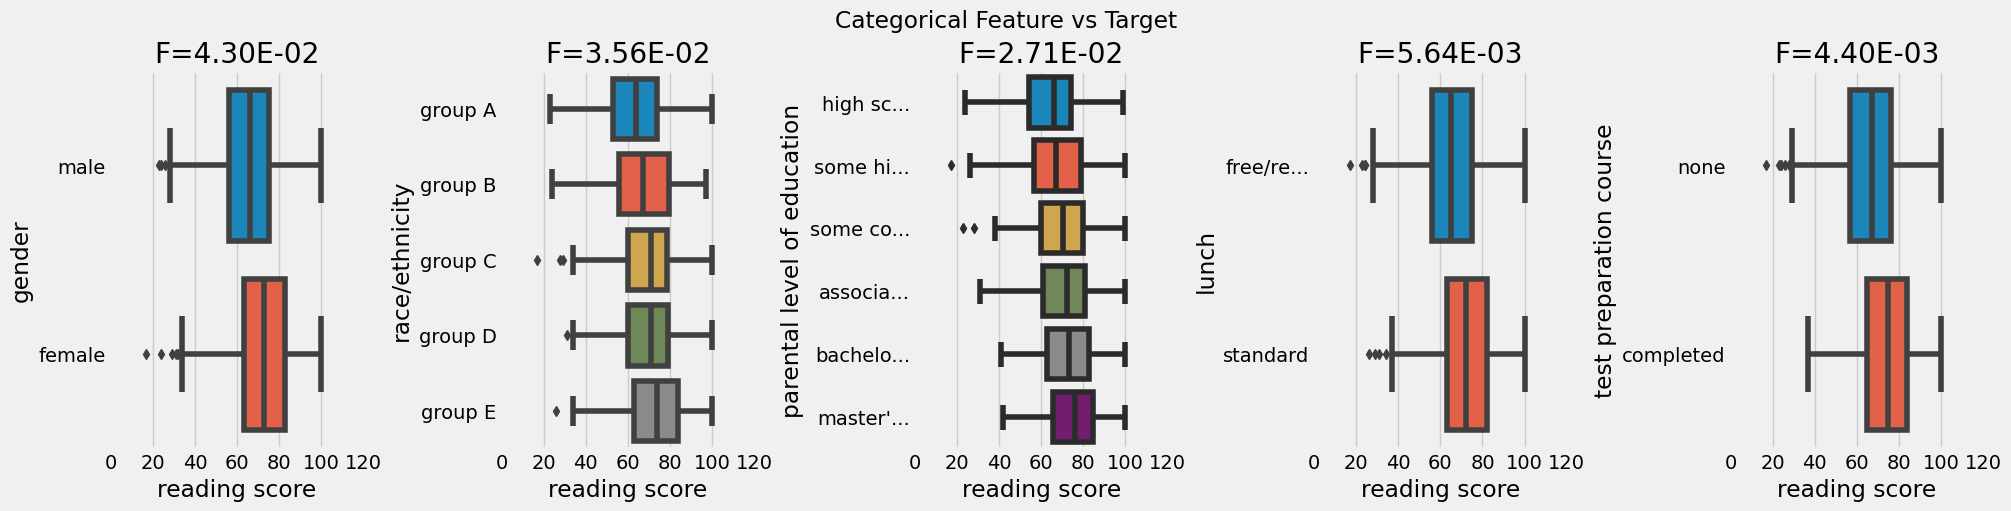

In [8]:
#Comparison of all other attributes with respect to Reading Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

In [9]:
#checking the Effect of Lunch on Student’s Performnce
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [10]:
data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('mean')

math score  writing score  reading score
lunch        gender                                          
free/reduced female   55.814815      66.444444      67.386243
             male     62.457831      59.126506      61.542169
standard     female   68.124620      75.927052      75.607903
             male     72.022152      65.509494      67.537975

In [11]:
#checking the Effect of Test Preparation Course on Scores
data[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

In [12]:
data[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg('mean')

math score  writing score  reading score
test preparation course gender                                          
completed               female   67.195652      78.793478      77.375000
                        male     72.339080      69.793103      70.212644
none                    female   61.670659      68.982036      69.982036
                        male     66.688312      59.649351      62.795455

# Data Visualizations

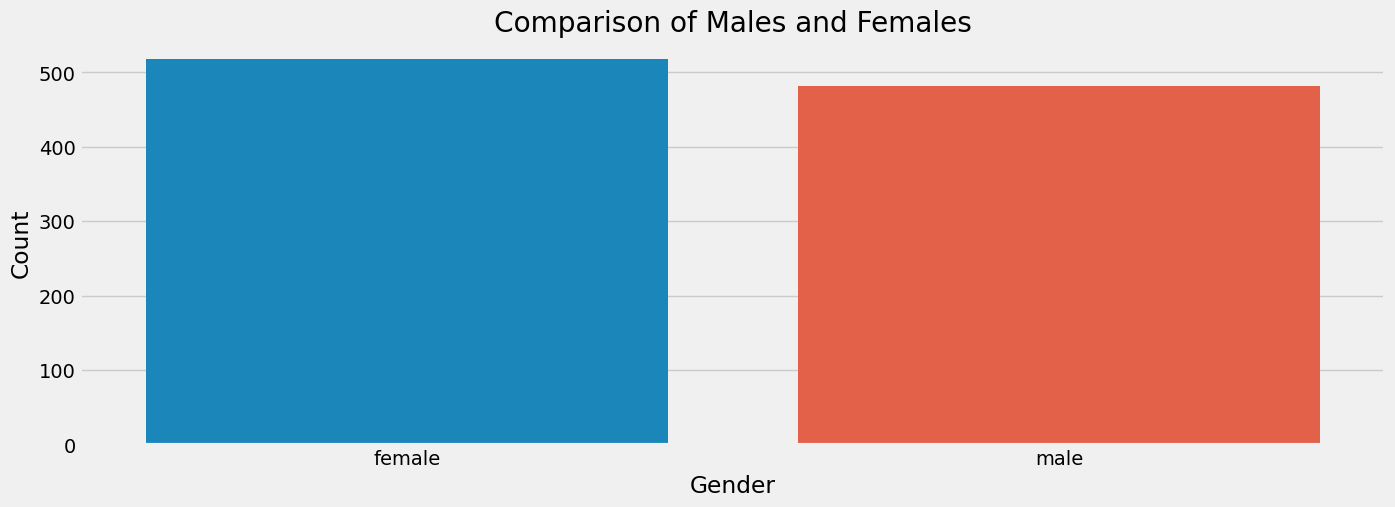

In [13]:
#Visualizing the number of male and female in the data set
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data, x='gender')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

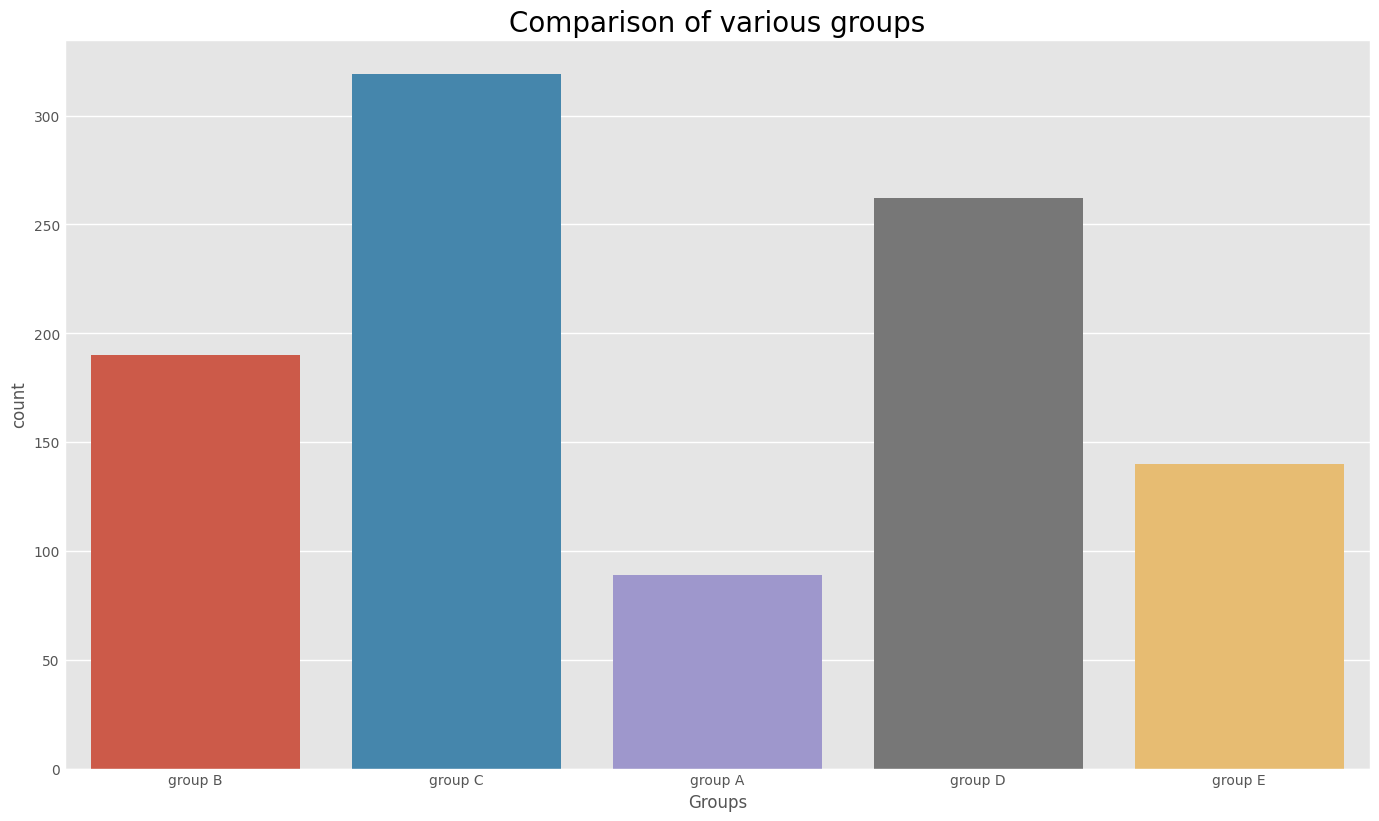

In [14]:
#Visualizing the different groups in the data set
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
sns.countplot(data,x= 'race/ethnicity')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

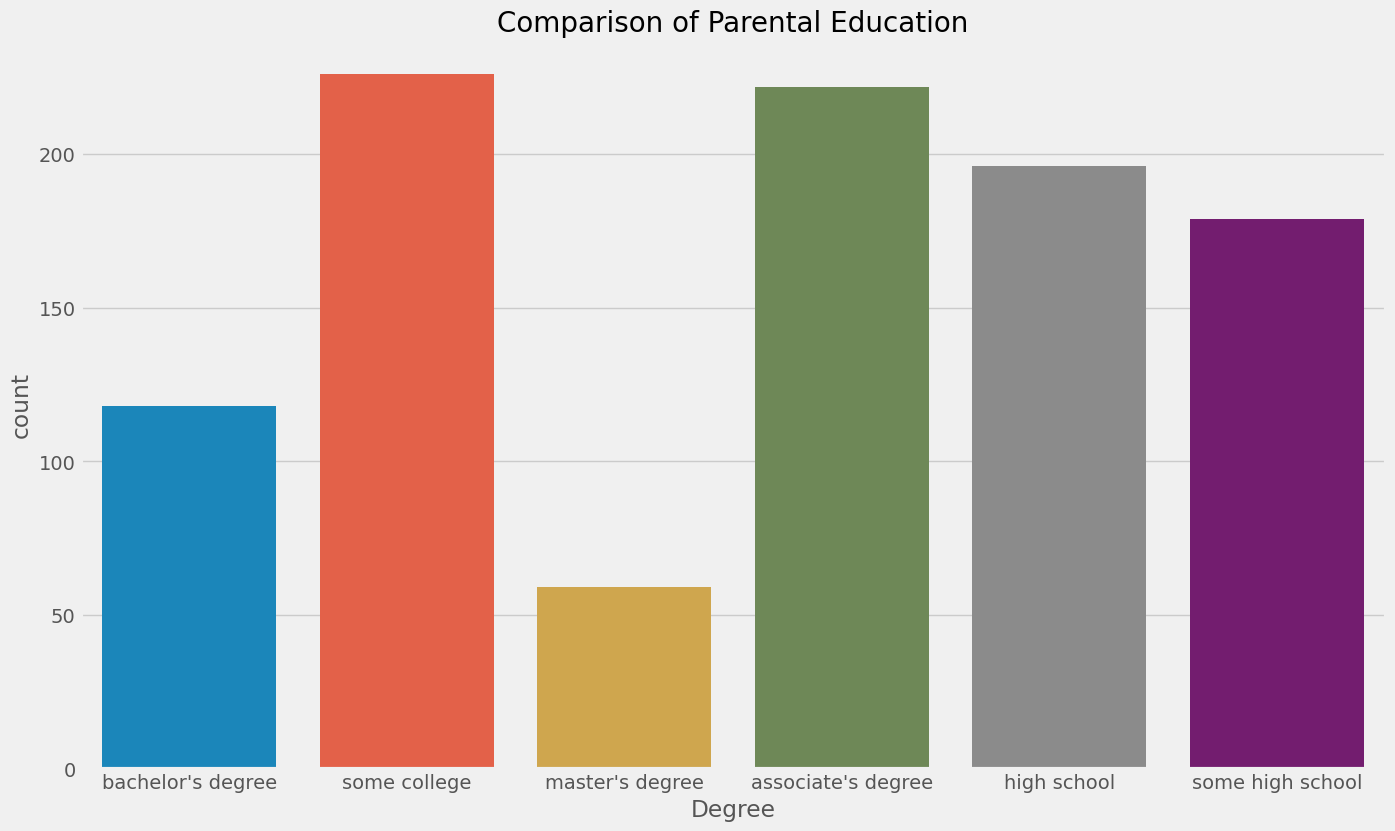

In [15]:
#Visualizing the different parental education levels
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data,x='parental level of education')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

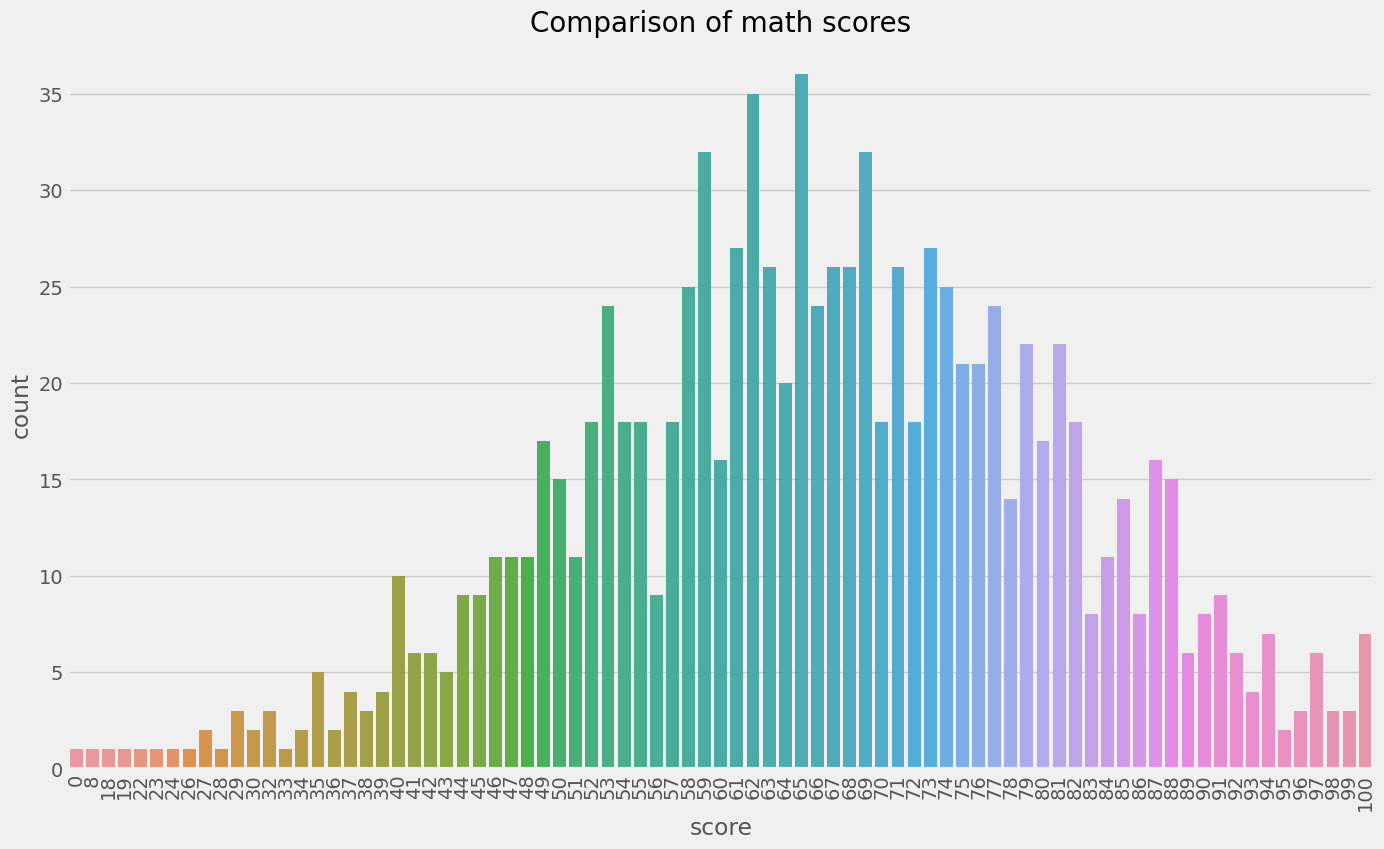

In [16]:
#Visualizing Maths score
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data,x='math score')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

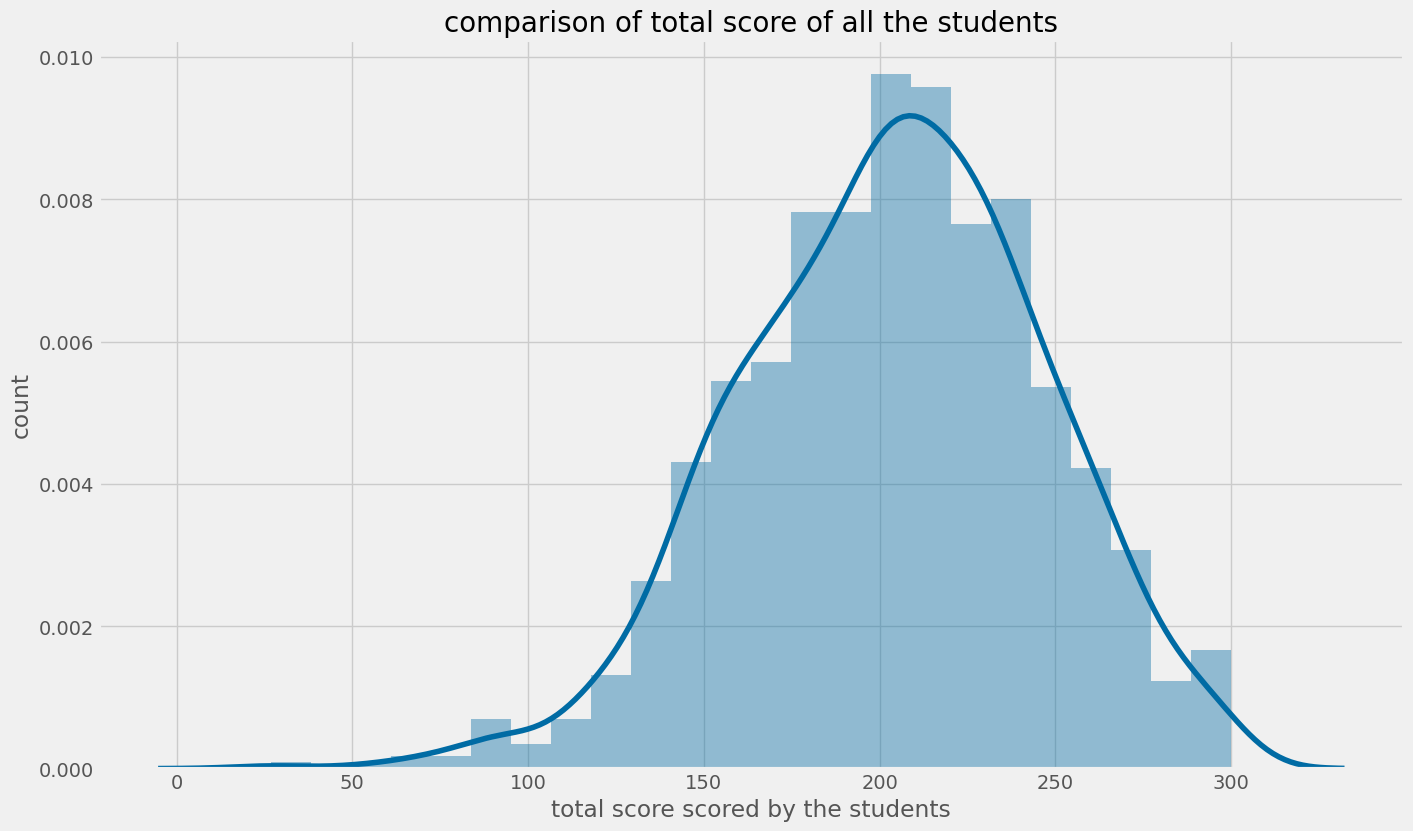

In [17]:
#Computing the total score for each student
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'])

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

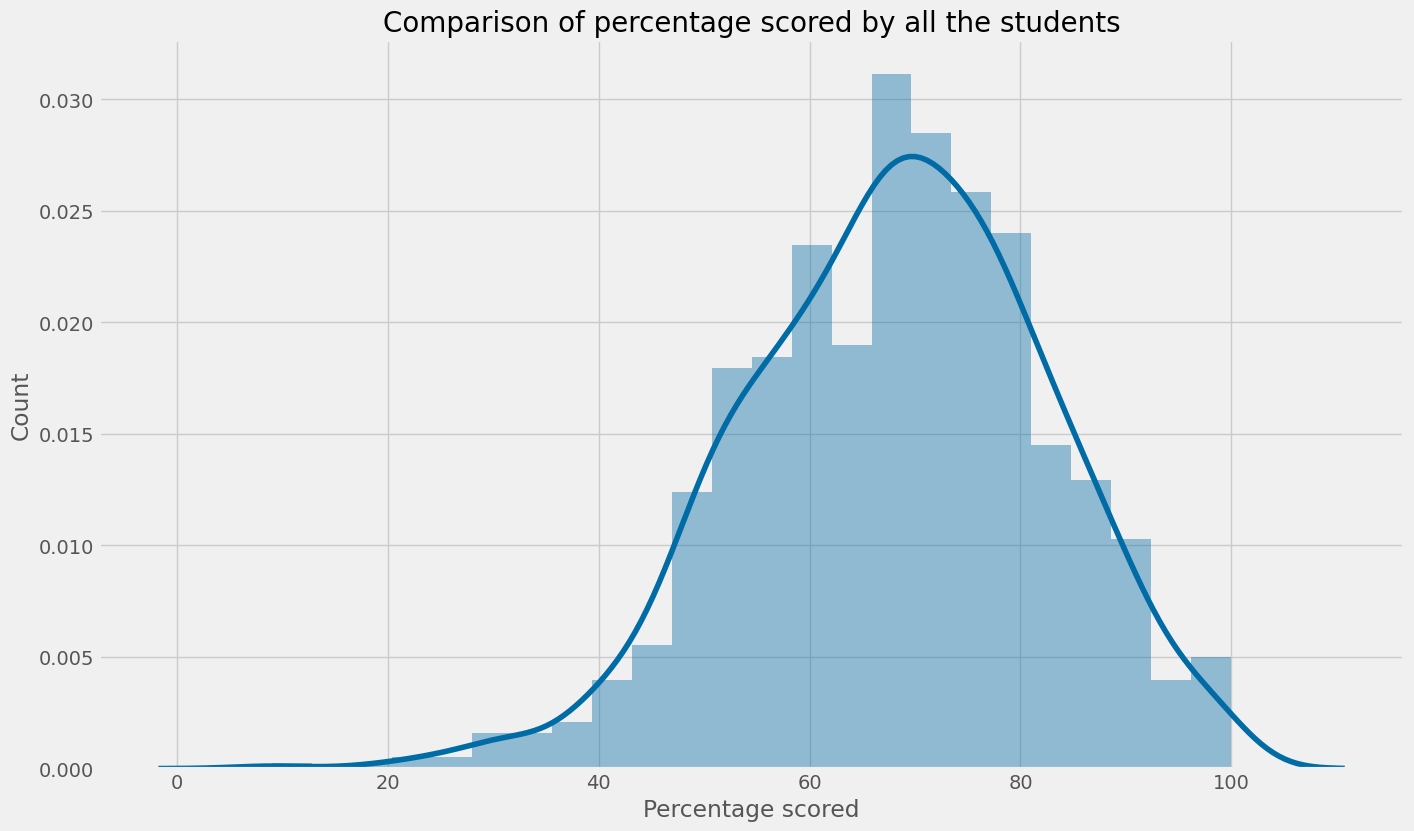

In [18]:
#Computing percentage for each of the students
# importing math library to use ceil
from math import *
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'])

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [19]:
def passs(x):
    if(x>=40):
        return "pass"
    else:
        return"fail"

In [20]:
data['pass_math'] = data.apply(lambda x: passs(x['math score']), axis = 1)
data['pass_reading'] = data.apply(lambda x: passs(x['reading score']), axis = 1)
data['pass_writing'] = data.apply(lambda x: passs(x['writing score']), axis = 1)

In [21]:
def getgrade(percentage):
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1)

data['grades'].value_counts()

B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

# Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])


# Data Preparation

In [23]:
x = data.iloc[:,:13]
y = data.iloc[:,13]

print(x.shape)
print(y.shape)

(1000, 13)
(1000,)


In [24]:
#Splitting the data set into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 13)
(750,)
(250, 13)
(250,)


In [25]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# creating a scaler
mm = MinMaxScaler()
# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# Principal Components Analysis (PCA)

In [26]:
# Applying principal components analysis
from sklearn.decomposition import PCA
# creating a principal component analysis model
pca = PCA(n_components = None)
# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
# creating a principal component analysis model
pca = PCA(n_components = 2)
# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

[2.47056500e-01 2.16513355e-01 1.98912941e-01 1.21676795e-01
 9.19255235e-02 6.84836831e-02 3.73407168e-02 1.19969846e-02
 3.14391912e-03 1.93744150e-03 1.00579376e-03 6.34621290e-06
 3.34114797e-33]


# Logistic Regression

In [27]:
from sklearn.linear_model import  LogisticRegression
# creating a model
model = LogisticRegression()
# feeding the training data to the model
model.fit(x_train, y_train)
# predicting the test set results
y_pred = model.predict(x_test)
# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.38666666666666666
Testing Accuracy : 0.432


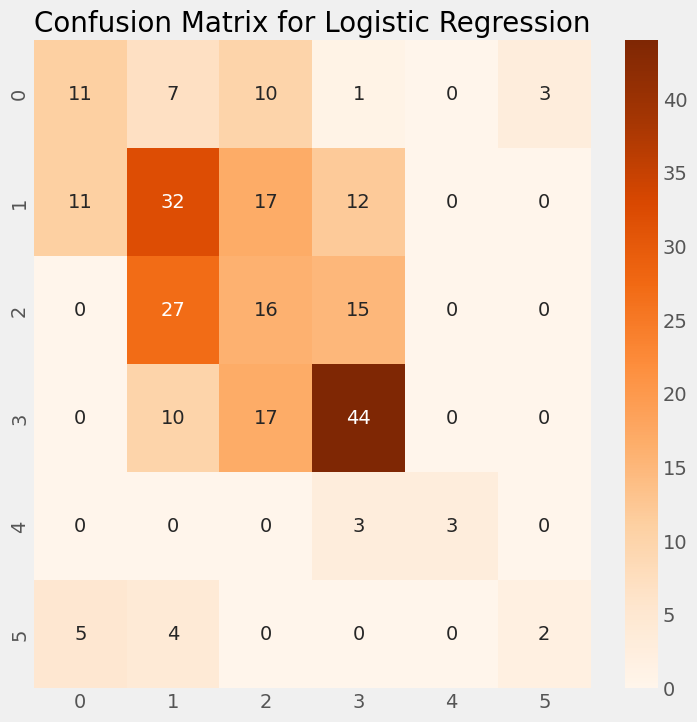

In [28]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Oranges')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
# creating a model
model = RandomForestClassifier()
# feeding the training data to the model
model.fit(x_train, y_train)
# predicting the x-test results
y_pred = model.predict(x_test)
# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.76


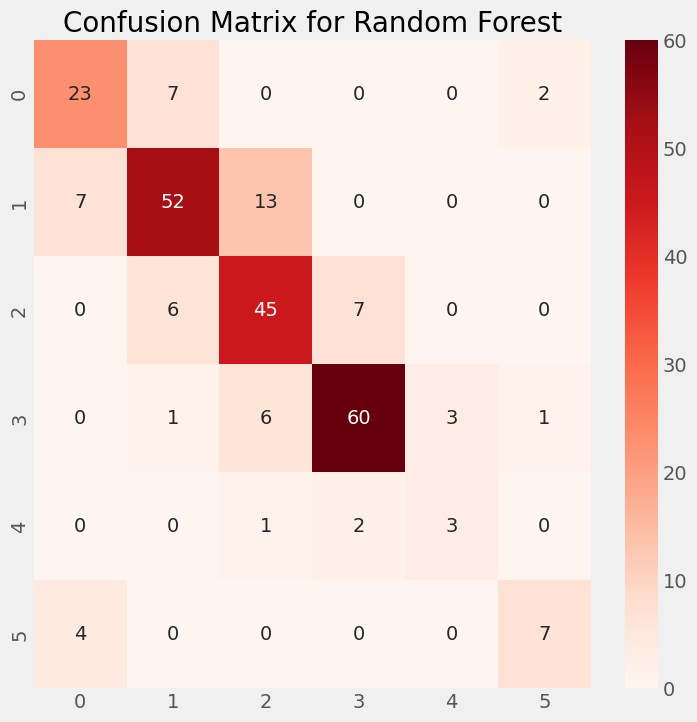

In [30]:
from sklearn.metrics import confusion_matrix
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

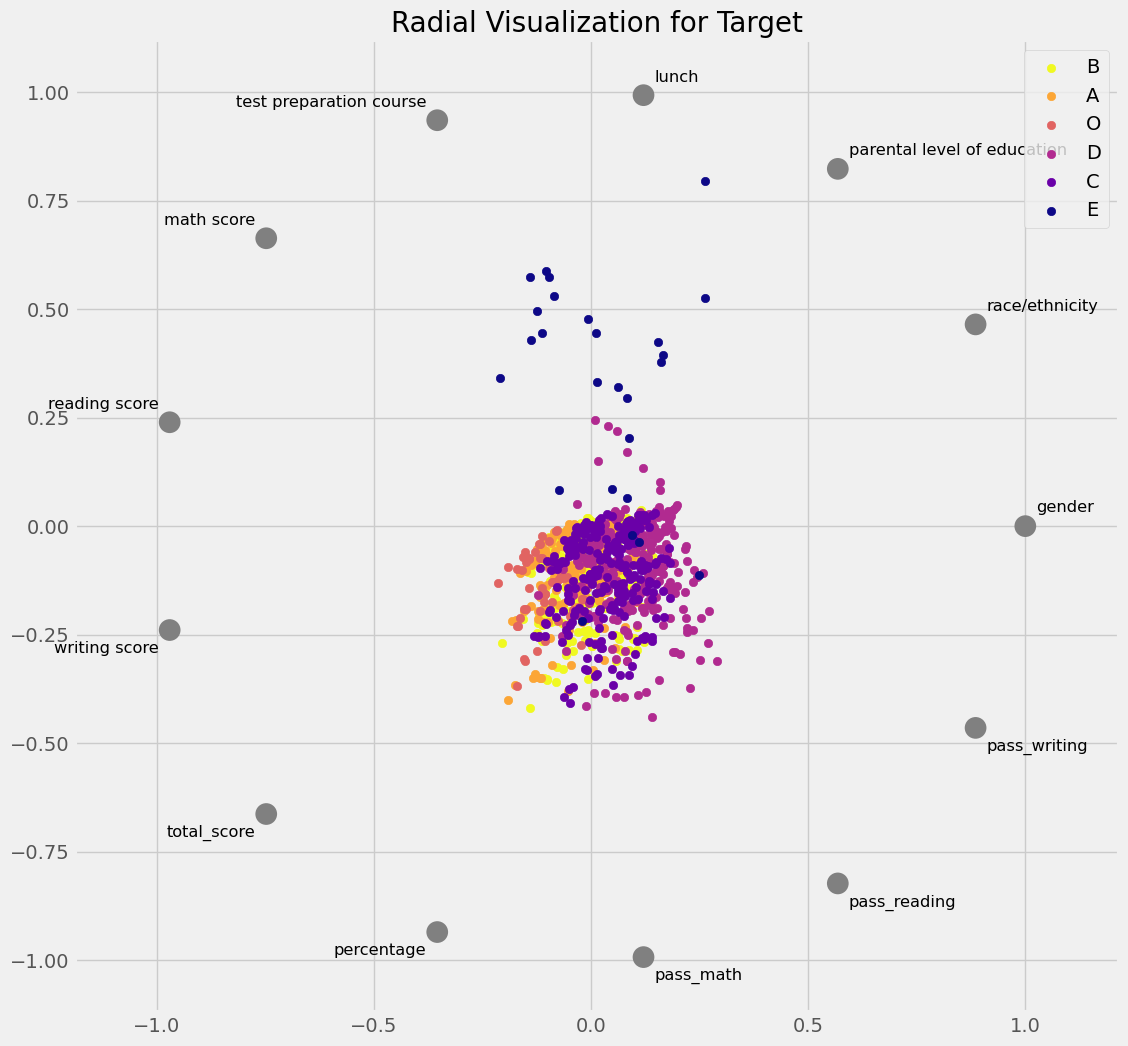

In [31]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="plasma_r")
plt.title('Radial Visualization for Target', fontsize = 20)
plt.show()

It gives a clear Idea that Students getting very low grades have high correlation on Lunch and Parental Education